In [41]:
import pandas as pd
from sklearn.metrics import log_loss
from sklearn.calibration import CalibrationDisplay

In [42]:
backtest_odds = pd.read_csv("../../data/backtesting/backtest_odds.csv")
predictions = pd.read_csv("../../model_files/lightgbm/predictions.csv")

In [43]:
bout_ids = backtest_odds.loc[backtest_odds["red_win"].notnull(), "bout_id"]
y_true = backtest_odds.loc[backtest_odds["red_win"].notnull(), "red_win"]
y_pred = predictions.loc[predictions["bout_id"].isin(bout_ids), "y_pred"]

In [44]:
log_loss(y_true, y_pred)

0.6110475962478324

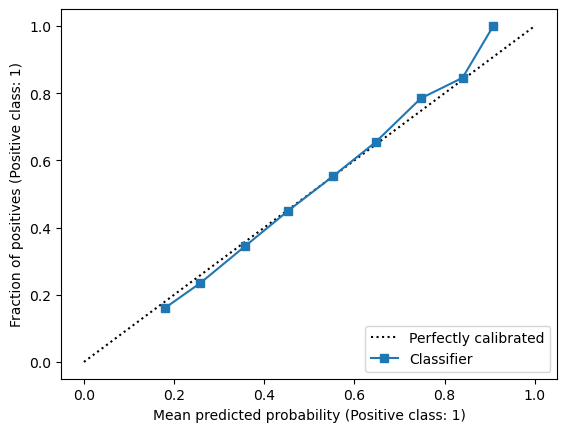

In [45]:
disp = CalibrationDisplay.from_predictions(
    y_true,
    y_pred,
    n_bins=10,
    strategy="uniform",
)